In [5]:
## loading dataset

import sys
import numpy as np
sys.path.append('../GitHub/MyMLCodes/CNN/')
sys.path.append('../GitHub/MyMLCodes/MLP/')
import pandas as pd

dataset = pd.read_csv('circle_data.csv')
del dataset['Unnamed: 0']
train = dataset[0:320]
test = dataset[320:]
print(train.head())

          X         Y  class
0  3.000000  0.000000      1
1 -0.708004  2.915258      1
2 -2.665820 -1.376010      1
3  1.966278 -2.265778      1
4  1.737731  2.445463      1


In [15]:
from sklearn.utils import shuffle

def training(train, epochs, mlp):
    train = train.values
    for i in range(epochs):
        train = shuffle(train)
        error = 0
        for j in range(train.shape[0]):
            out = mlp.Forward(train[j][0:2])
            if train[j][2]==1:
                grads = mlp.gradient_calci(out, np.array([1,0]))
                error+=0.5*np.sum(np.power((np.array([1,0])-out[-1]),2))
            else:
                grads = mlp.gradient_calci(out, np.array([0,1]))
                error+=0.5*np.sum(np.power((np.array([0,1])-out[-1]),2))
            mlp.backprop(grads)
        print('epoch: ',i, ' error: ', error)
            
def testing(test, mlp):
    test = test.values
    accuracy = 0
    for i in range(test.shape[0]):
        out = mlp.Forward(test[i][0:2])
        if test[i][2]==1 and out[-1][0]>=out[-1][1]:
            accuracy+=1
        elif test[i][2]==2 and out[-1][0]<=out[-1][1]:
            accuracy+=1
    print('accuracy:', accuracy/test.shape[0])

def predict(X, mlp):
    predictions = []
    for i in range(X.shape[0]):
        out = mlp.Forward(X[i][0:2])
        predictions.append(np.argmax(out[-1]))
    return predictions

In [13]:
import MLP

m1 = MLP.MLP([2, 5, 2], lr = 0.01)
print('train accuracy before training:')
testing(train, m1)
print('test accuracy before training:')
testing(test, m1)
training(train,1000, m1)
print('train accuracy after training:')
testing(train, m1)
print('test accuracy after training:')
testing(test,m1)

train accuracy before training:
accuracy: 0.565625
test accuracy before training:
accuracy: 0.35
epoch:  0  error:  114.05551867032085
epoch:  1  error:  99.14653045385376
epoch:  2  error:  87.74768283045175
epoch:  3  error:  82.07764291374085
epoch:  4  error:  79.27138202465535
epoch:  5  error:  77.65816418557317
epoch:  6  error:  76.65859908277791
epoch:  7  error:  76.06732809877788
epoch:  8  error:  75.69081916646645
epoch:  9  error:  75.48892817758798
epoch:  10  error:  75.36102747835574
epoch:  11  error:  75.26044888881556
epoch:  12  error:  75.18955861200342
epoch:  13  error:  75.13025303596184
epoch:  14  error:  75.06388975976064
epoch:  15  error:  75.00234301290494
epoch:  16  error:  74.97561424395187
epoch:  17  error:  74.93478320386343
epoch:  18  error:  74.89522561273311
epoch:  19  error:  74.85829909784948
epoch:  20  error:  74.82330434055022
epoch:  21  error:  74.79059695062975
epoch:  22  error:  74.75675237341638
epoch:  23  error:  74.71653318860287


epoch:  221  error:  68.0736812794014
epoch:  222  error:  68.00159031661228
epoch:  223  error:  67.97101843561592
epoch:  224  error:  67.9001074191019
epoch:  225  error:  67.85218868326538
epoch:  226  error:  67.78880852934745
epoch:  227  error:  67.73221151745233
epoch:  228  error:  67.6487857024524
epoch:  229  error:  67.61383343254758
epoch:  230  error:  67.5090278243976
epoch:  231  error:  67.48916945607976
epoch:  232  error:  67.42336860664054
epoch:  233  error:  67.3342930205719
epoch:  234  error:  67.30517938574368
epoch:  235  error:  67.24248636150216
epoch:  236  error:  67.17106410070866
epoch:  237  error:  67.09302670095633
epoch:  238  error:  67.0321266160761
epoch:  239  error:  66.96708625457939
epoch:  240  error:  66.92292356989682
epoch:  241  error:  66.84267058552061
epoch:  242  error:  66.78235640846445
epoch:  243  error:  66.73199351345049
epoch:  244  error:  66.65127836889496
epoch:  245  error:  66.58966170469816
epoch:  246  error:  66.5379771

epoch:  437  error:  52.12583423733128
epoch:  438  error:  52.031616143772816
epoch:  439  error:  51.95638246884456
epoch:  440  error:  51.88229871783132
epoch:  441  error:  51.79983029581299
epoch:  442  error:  51.75212141392535
epoch:  443  error:  51.653706258325336
epoch:  444  error:  51.609919183980146
epoch:  445  error:  51.49367394446849
epoch:  446  error:  51.48332050926178
epoch:  447  error:  51.37811053630981
epoch:  448  error:  51.32853218374333
epoch:  449  error:  51.20750045815246
epoch:  450  error:  51.18099870224727
epoch:  451  error:  51.07831125847563
epoch:  452  error:  51.00790045066602
epoch:  453  error:  50.913401265438466
epoch:  454  error:  50.89995696998729
epoch:  455  error:  50.79321250342807
epoch:  456  error:  50.688340249748556
epoch:  457  error:  50.68416064212147
epoch:  458  error:  50.58241150664659
epoch:  459  error:  50.504767891796874
epoch:  460  error:  50.41226348751928
epoch:  461  error:  50.266889578369245
epoch:  462  error

epoch:  648  error:  35.853556254823765
epoch:  649  error:  35.772178965269134
epoch:  650  error:  35.66841126290031
epoch:  651  error:  35.60694722922545
epoch:  652  error:  35.533381083171555
epoch:  653  error:  35.492606474531506
epoch:  654  error:  35.33672451148324
epoch:  655  error:  35.27000700609208
epoch:  656  error:  35.116065570421995
epoch:  657  error:  35.123722125331646
epoch:  658  error:  35.016897364478034
epoch:  659  error:  35.00282414179253
epoch:  660  error:  34.850774142729115
epoch:  661  error:  34.83084831839318
epoch:  662  error:  34.78350802989996
epoch:  663  error:  34.69292915271443
epoch:  664  error:  34.62760656539976
epoch:  665  error:  34.54264844195763
epoch:  666  error:  34.472305294586086
epoch:  667  error:  34.3937948181281
epoch:  668  error:  34.321733278449294
epoch:  669  error:  34.180359741771824
epoch:  670  error:  34.10586202887833
epoch:  671  error:  34.08671276891679
epoch:  672  error:  34.050359742088034
epoch:  673  e

epoch:  863  error:  22.83977497166079
epoch:  864  error:  22.798506006451525
epoch:  865  error:  22.762978986806097
epoch:  866  error:  22.728512649671078
epoch:  867  error:  22.683467288515555
epoch:  868  error:  22.635735493112566
epoch:  869  error:  22.606843592433062
epoch:  870  error:  22.580875451425907
epoch:  871  error:  22.509519768359354
epoch:  872  error:  22.483948975666294
epoch:  873  error:  22.444399034163453
epoch:  874  error:  22.37042443533358
epoch:  875  error:  22.35110155620591
epoch:  876  error:  22.308137839214815
epoch:  877  error:  22.238032663277018
epoch:  878  error:  22.231602260140917
epoch:  879  error:  22.200303319497525
epoch:  880  error:  22.109141509411202
epoch:  881  error:  22.10979196545611
epoch:  882  error:  22.016678103096268
epoch:  883  error:  22.051662750997643
epoch:  884  error:  21.937992542408654
epoch:  885  error:  21.933584356033993
epoch:  886  error:  21.90453151474326
epoch:  887  error:  21.854823211143763
epoch

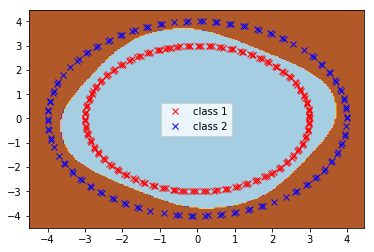

In [16]:
##visualizing the decision boundary

import matplotlib.pyplot as plt

df1 = train[train['class']==1]
df2 = train[train['class']==2]

x= np.arange(-4.5,4.5,0.05)
y = np.arange(-4.5,4.5,0.05)
xx,xy = np.meshgrid(x,y)
X = np.c_[xx.ravel(), xy.ravel()]
p = np.array(predict(X, m1))
p = p.reshape(xx.shape)
plt.plot(df1.X, df1.Y, 'rx', label = 'class 1')
plt.plot(df2.X, df2.Y, 'bx', label = 'class 2')
plt.contourf(xx, xy, p, cmap=plt.cm.Paired, alpha=1)
plt.legend()
plt.show()